## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mdf = pd.merge(mouse_metadata, study_results, how='inner',on='Mouse ID')
# Combine the data into a single dataset
mdf.sample(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1411,q511,Zoniferol,Female,2,28,20,52.672712,0
1702,w422,Ketapril,Female,18,26,40,63.072585,4
171,a644,Ramicane,Female,7,17,30,37.211121,0
1526,s565,Stelasyn,Female,3,29,35,64.776579,2
1164,m133,Naftisol,Female,2,26,0,45.000000,0
448,w678,Ramicane,Female,5,24,0,45.000000,0
1229,n763,Placebo,Female,16,25,0,45.000000,0
1615,v339,Infubinol,Male,20,26,0,45.000000,0
413,q597,Ramicane,Male,20,25,10,42.537986,0
866,g296,Zoniferol,Female,14,29,5,46.593233,0


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
ndf = pd.DataFrame()
ndf['Mean'] = mdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
ndf['Median'] = mdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
ndf['Variance'] = mdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
ndf['Std Dev'] =  mdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
ndf['SEM'] =  mdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
ndf

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mdf.groupby('Drug Regimen').count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


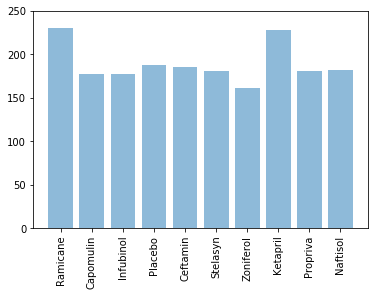

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
idx = mdf['Drug Regimen'].unique().tolist()
x_axis = np.arange(len(idx))
dps = mdf.groupby('Drug Regimen')['Mouse ID'].count().tolist()
plt.bar(x_axis, dps, align='center', alpha=0.5)
plt.xticks(x_axis, idx, rotation = 90)
plt.yticks([0,50,100,150,200,250])
plt.show()

## Pie plots

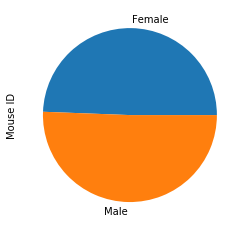

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
s = pd.Series()
s = mdf.groupby('Sex')['Mouse ID'].count()
s.plot.pie()


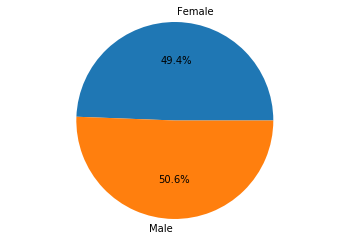

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = mdf.groupby('Sex')['Mouse ID'].count().tolist()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.axis('equal')
plt.show()
r = mdf.groupby('Sex')['Mouse ID'].count()
r

## Quartiles, outliers and boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# get everything for the final timepoint (45)
tdf = mdf.loc[mdf['Timepoint'] == 45, :]
# most promising will be the 4 with the smallest average (mean) tumor volume
tdf = tdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().sort_values().head(4)
top_four = tdf.index.tolist()

# If the data is in a dataframe, we use pandas to give quartile calculations

top_dict = {
    'Regimen' : [],
    'Median' : [],
    'LowerQ' : [],
    'UpperQ' : [],
    'IQR' : [],
    'Upper Bound' : [],
    'Lower Bound' : []
}

topdf = pd.DataFrame()
plotdf = pd.DataFrame()

for regimen in top_four:
    top_dict['Regimen'].append(regimen)
    testdf = mdf.loc[mdf['Drug Regimen'] == regimen, :]
    plotdf[regimen] = testdf['Tumor Volume (mm3)']
    top_dict['Median'].append(testdf['Tumor Volume (mm3)'].median())
    quartiles = testdf['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    top_dict['LowerQ'].append(quartiles[.25])
    top_dict['UpperQ'].append(quartiles[.75])
    top_dict['IQR'].append(quartiles[.75] - quartiles[.25])

    l = quartiles[.25] - (1.5*(quartiles[.75] - quartiles[.25]))
    u = quartiles[.75] + (1.5*(quartiles[.75] - quartiles[.25]))
    
    top_dict['Lower Bound'].append(l)
    top_dict['Upper Bound'].append(u)
    
top_df = pd.DataFrame.from_dict(top_dict)
top_df

,Regimen,Median,LowerQ,UpperQ,IQR,Upper Bound,Lower Bound
0,Ramicane,40.673236,36.674635,45.000000,8.325365,57.488048,24.186586
1,Capomulin,41.557809,37.685933,45.000000,7.314067,55.971101,26.714832
2,Ceftamin,51.776157,47.208427,56.801438,9.593010,71.190953,32.818911
3,Infubinol,51.820584,47.312353,57.314444,10.002091,72.317580,32.309217


In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#ax = testdf['Tumor Volume (mm3)'].plot.box()

plotdf
#ax = top_df.plot.box()

,Ramicane,Capomulin,Ceftamin,Infubinol
0,45.000000,NaN,NaN,NaN
1,38.825898,NaN,NaN,NaN
2,35.014271,NaN,NaN,NaN
3,34.223992,NaN,NaN,NaN
4,32.997729,NaN,NaN,NaN
...,...,...,...,...
449,43.166373,NaN,NaN,NaN
450,45.000000,NaN,NaN,NaN
451,45.877545,NaN,NaN,NaN
452,46.378092,NaN,NaN,NaN


## Line and scatter plots

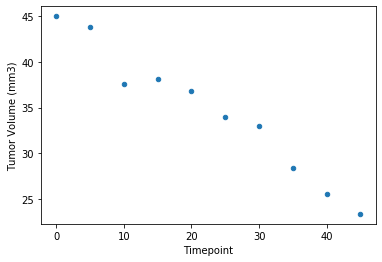

In [75]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cdf = mdf.loc[mdf['Drug Regimen'] == 'Capomulin'].loc[mdf['Mouse ID'] == 's185']
cdf.plot.scatter('Timepoint', 'Tumor Volume (mm3)')

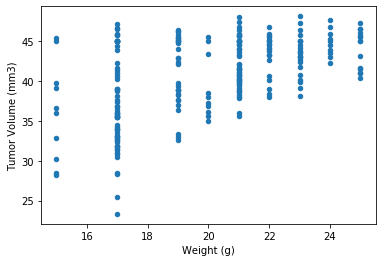

In [80]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
wdf = mdf.loc[mdf['Drug Regimen'] == 'Capomulin']
wdf.groupby('Tumor Volume (mm3)').mean()
wdf.plot.scatter('Weight (g)', 'Tumor Volume (mm3)')

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen